### Soccer National Team Selection Predictor

by Md Nafisul Hasan Sami

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load data
df = pd.read_csv("top5-players.csv")
df.head()


,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Gls_90,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,23.0,2000.0,20,13,...,0.00,0.07,0.07,0.00,0.07,0.00,0.06,0.06,0.00,0.06
1,2,Brenden Aaronson,us USA,"MF,FW",Union Berlin,de Bundesliga,22.0,2000.0,30,14,...,0.14,0.14,0.28,0.14,0.28,0.14,0.13,0.27,0.14,0.27
2,3,Paxten Aaronson,us USA,MF,Eint Frankfurt,de Bundesliga,19.0,2003.0,7,1,...,0.00,0.89,0.89,0.00,0.89,0.11,0.07,0.19,0.11,0.19
3,4,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,17.0,2006.0,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,5,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,35.0,1987.0,31,31,...,0.13,0.00,0.13,0.10,0.10,0.11,0.01,0.12,0.09,0.09


In [43]:
df.info()
df.head()
df.columns  # See all available column names


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2852 entries, 0 to 2851
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rk           2852 non-null   int64  
 1   Player       2852 non-null   object 
 2   Nation       2849 non-null   object 
 3   Pos          2852 non-null   object 
 4   Squad        2852 non-null   object 
 5   Comp         2852 non-null   object 
 6   Age          2848 non-null   float64
 7   Born         2848 non-null   float64
 8   MP           2852 non-null   int64  
 9   Starts       2852 non-null   int64  
 10  Min          2852 non-null   int64  
 11  90s          2852 non-null   float64
 12  Gls          2852 non-null   int64  
 13  Ast          2852 non-null   int64  
 14  G+A          2852 non-null   int64  
 15  G-PK         2852 non-null   int64  
 16  PK           2852 non-null   int64  
 17  PKatt        2852 non-null   int64  
 18  CrdY         2852 non-null   int64  
 19  CrdR  

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt',
       'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR',
       'Gls_90', 'Ast_90', 'G+A_90', 'G-PK_90', 'G+A-PK_90', 'xG_90', 'xAG_90',
       'xG+xAG_90', 'npxG_90', 'npxG+xAG_90'],
      dtype='object')

In [44]:
df = df[['Age', 'Gls', 'Ast', 'Min']] 


In [45]:
df = df.dropna()
df.info() 


<class 'pandas.core.frame.DataFrame'>
Index: 2848 entries, 0 to 2851
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     2848 non-null   float64
 1   Gls     2848 non-null   int64  
 2   Ast     2848 non-null   int64  
 3   Min     2848 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 111.2 KB


In [46]:
df['Selected'] = df.apply(lambda row: 1 if (row['Gls'] > 5 or row['Min'] > 1000) else 0, axis=1)
df['Selected'].value_counts()


Selected
1    1537
0    1311
Name: count, dtype: int64

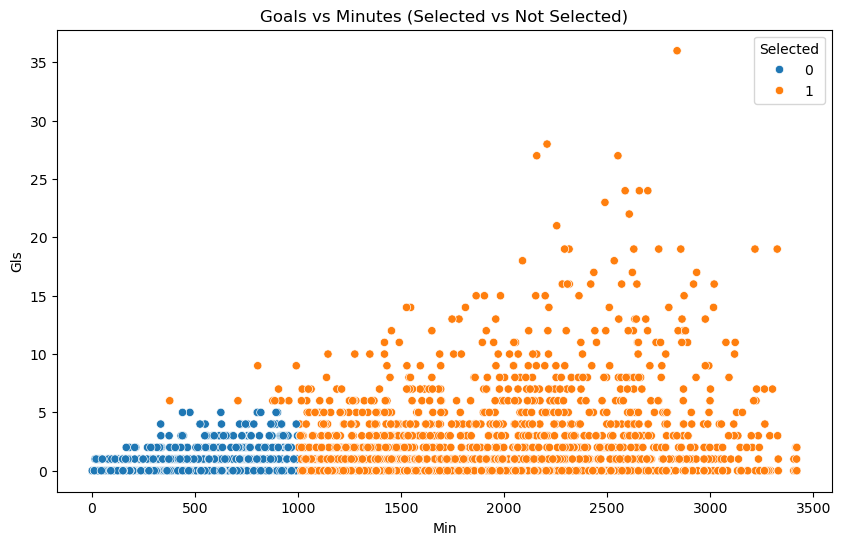

In [47]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Min', y='Gls', hue='Selected')
plt.title("Goals vs Minutes (Selected vs Not Selected)")
plt.show()

In [48]:
X = df[['Age', 'Gls', 'Ast', 'Min']]
y = df['Selected']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       264
           1       1.00      0.99      1.00       306

    accuracy                           0.99       570
   macro avg       0.99      0.99      0.99       570
weighted avg       0.99      0.99      0.99       570

Accuracy: 0.9947368421052631


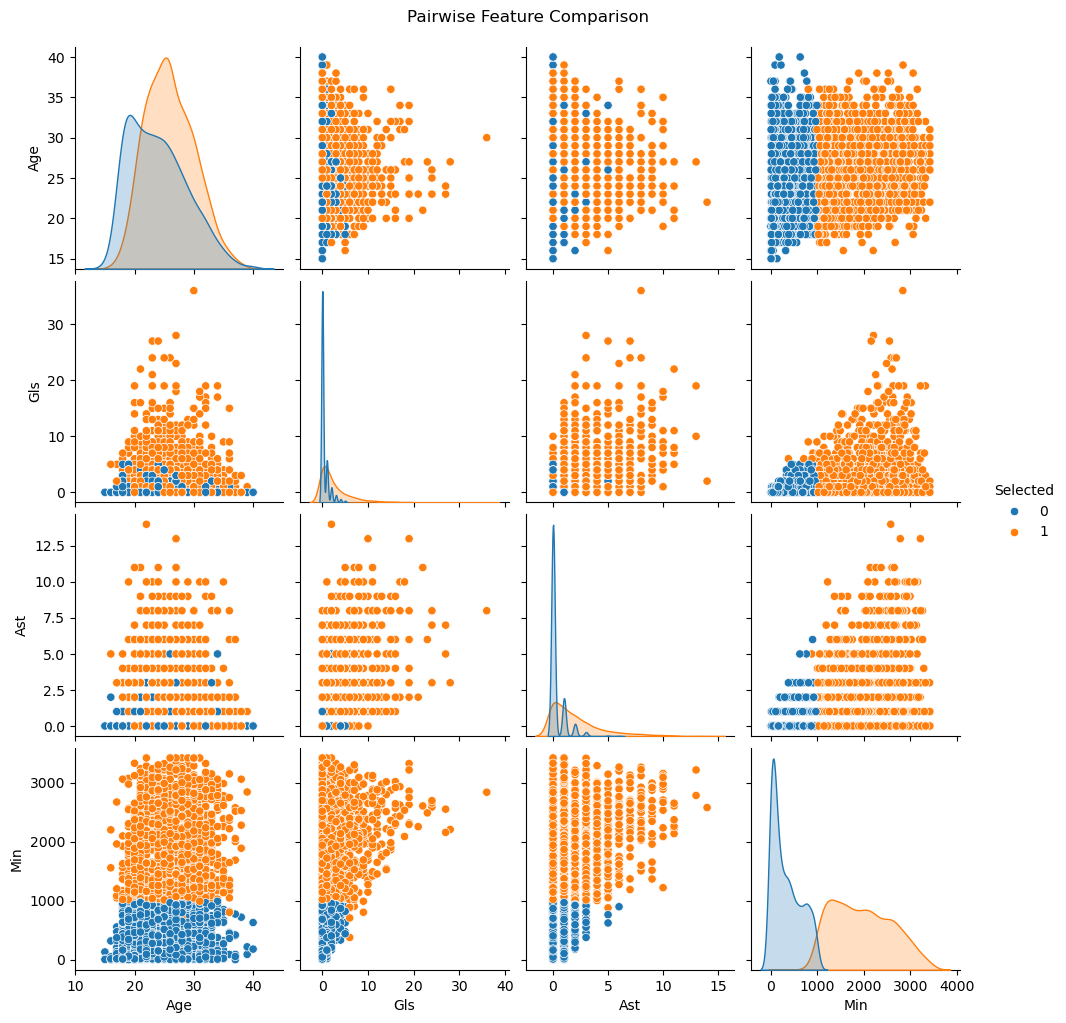

In [49]:
sns.pairplot(df[['Age', 'Gls', 'Ast', 'Min', 'Selected']], hue='Selected')
plt.suptitle("Pairwise Feature Comparison", y=1.02)
plt.show()
